In [1]:
import torch

In [2]:
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
# Set random seed for reproducibility
torch.manual_seed(42)

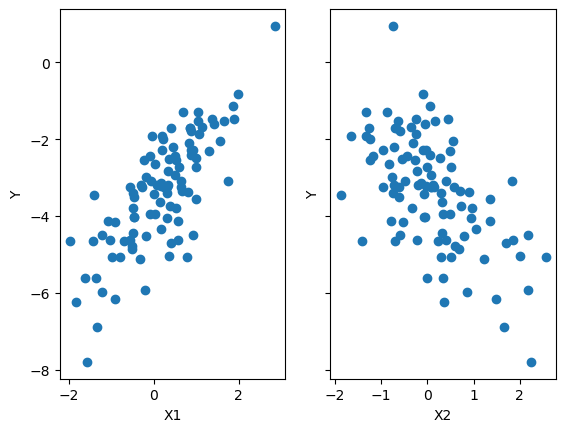

In [5]:
# Set number of samples
num_samples = 100

# Create random feature with 2 dimensions
x = torch.randn(num_samples, 2)

# Create random weights and bias for linear regression model
true_weights = torch.tensor([1.3, -1])
true_bias = torch.tensor([-3.5])

# Target Variable
y = x @ true_weights.T + true_bias

# Plot the dataset
fig, ax = plt.subplots(1,2, sharey = True)

ax[0].scatter(x[:, 0], y)
ax[1].scatter(x[:, 1], y)

ax[0].set_xlabel('X1')
ax[0].set_ylabel('Y')
ax[1].set_xlabel('X2')
ax[1].set_ylabel('Y')

plt.show()

# Let's try with a linear model

In [6]:
# Define the model
class LinearRegression(nn.Module):
    def _init_(self, input_size, output_size):
        super(LinearRegression, self)._init_()
        self.linear = nn.linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

# Define the input and output dimensions
input_size = x.shape[1]
output_size = 1

# Instantiate the model
model = LinearRegression(input_size, output_size)
    

TypeError: LinearRegression.__init__() takes 1 positional argument but 3 were given

In [7]:
# Create a random weight and bias tensor
weight = torch.randn(1, input_size)
bias = torch.rand(1)

# Create a nn.parameter object from the weight and bias tensor
weight_param = nn.Parameter(weight)
bias_param = nn.parameter(bias)

# assign the weight and bias parameter to the linear layer
model.linear.weight = weight_param
model.linear.bias = bias_param

weight, bias = model.parameters()
print(weight)
print(bias)

TypeError: 'module' object is not callable

In [8]:
# Define the loss function
def Mean_Squared_Error(prediction, actual):
    error = (actual-predicyion)**2
    return error.mean()

# Find the total mean squared error
loss = Mean_Squared_Error(y_p, y)
loss


NameError: name 'y_p' is not defined

NameError: name 'model' is not defined

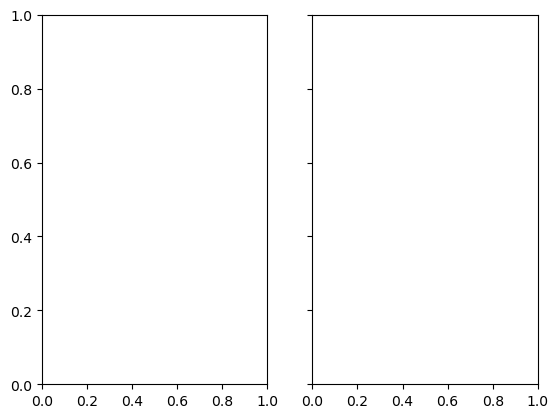

In [13]:
# Number of epochs
num_epochs = 1000

#Leraning Rate
learning_rate = 0.01

# Subplot weight and bias VS Losses
fig, (ax1, ax2) = plt.subplots(1,2, sharey = True)

for epochs in range(num_epochs):
    # Forward Pass
    y_p = model(x)
    loss = Mean_Squared_Error(y_p, y)
    
    # Backpropagation
    # Find the gradient using
    loss.backward()
    
    # Learning Rate
    learning_rate = 0.001
    #Model Parameter
    w = model.linear.weight
    b = model.linear.bias
    
    # Manually update the model parameter
    w = w - learning_rate * w.grad
    b = b - learning_rate * b.grad
    
    # Assign the weight and bias parameter to the linear layer
    model.linear.weight = nn.Parameter(w)
    model.linear.bias = nn.Parameter(b)
    
    if (epoch + 1) % 100 == 0:
        ax1.plot(w.detach().numpy(),loss.item(), 'r*-')
        ax2.plot(b.detach().numpy(), loss.item(), 'g+-')
        print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(epoch+1, num_epochs, w.detach().numpy(), 
                                                                      b.detach().numpy(), loss.item()))
ax1.set_xlabel('weight')
ax2.set_xlabel('bias')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Loss')
plt.show()

In [14]:
w = model.linear.weight
b = model.linear.bias

print('weight(W) = {} \n  bias(b) = {}'.format(
  w.abs(), 
  b.abs()))

NameError: name 'model' is not defined